In [7]:
username = "Alex"
env = "integrate"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\")
include(pathtorepo * "dynamical-systems\\system.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [8]:
using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra, IntervalRootFinding 
using CairoMakie, GLMakie

In [9]:
function get_eigen(u, p, jac_system, t = 0.0)
    Ju = jac_system(u, p, t)
    ei_u = eigen(Ju)
    return (fp = u, ei = ei_u)
end
function show_fp_eigen(data)
    println("fixed point: $(data.fp)")
    println("---------------------------------------------------")
    println("eigenvalues: $(data.ei.values)")
    println("---------------------------------------------------")
    println("eigenvectors:")
    show(stdout, "text/plain", data.ei.vectors); println()
    println("---------------------------------------------------"); println()
end
function shift_vec(eifp, col; ϵ = 1e-6, sign_ = +)
    sign_(eifp.fp, real(eifp.ei.vectors[:, 1]) * ϵ)
end;

In [10]:
t = 500.0; tt = 600.0; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep)

E = interval(-40, 40); x = interval(0, 1); y = interval(0, 1)
box = IntervalBox(E, x, y);

In [11]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305;

In [188]:
U0, I0 = 0.24915304713569425, -2.4
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0];

In [189]:
u0 = [7.485044731286254, 0.771932479798953, 0.5235934863993938]
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.24915304713569425, 0.305, 0.3, -2.4]
 time:          0.0
 state:         [7.485044731286254, 0.771932479798953, 0.5235934863993938]


In [190]:
fp, _, _ = fixedpoints(ds, box, jacob_TM_, method = IntervalRootFinding.Newton)
println("count of fixed points: $(length(fp))");

count of fixed points: 1


In [191]:
fp

3-dimensional StateSpaceSet{Float64} with 1 points
 0.496862  0.978466  0.979844

In [192]:
tr, trange = trajectory(ds, t, Δt = tstep);

In [194]:
index = 1
show_fp_eigen(get_eigen(fp[index], p, jacob_TM_));

fixed point: [0.4968616686714108, 0.9784661910195913, 0.9798439508355982]
---------------------------------------------------
eigenvalues: [-42.047753303583946, -13.11138670377383, -0.3030303030303196]
---------------------------------------------------
eigenvectors:
3×3 SMatrix{3, 3, Float64, 9} with indices SOneTo(3)×SOneTo(3):
  0.999828     0.514224     2.76517e-12
  0.018527     0.857646    -2.72362e-13
 -2.70375e-5  -0.00407922   1.0
---------------------------------------------------



In [195]:
lb_size = 35; tck_size = 30; dis = 60;

In [196]:
fp

3-dimensional StateSpaceSet{Float64} with 1 points
 0.496862  0.978466  0.979844

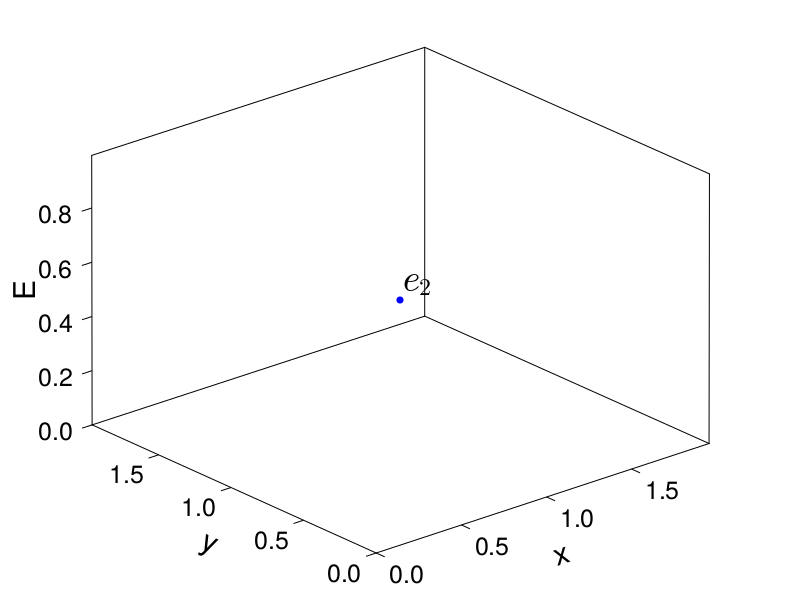

CairoMakie.Screen{IMAGE}


In [197]:
ts, tf = 200000, 300000
idx, idy, idz = 2, 3, 1
lb_size = 30; tck_size = 25;
textsize = 40
CairoMakie.activate!()
f = Figure(resolution = (800, 600), title = "?")
axis3_1 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)

lines!(axis3_1, tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz],
linewidth = 2.0, linestyle = :solid, color = :black)

scatter!(axis3_1, fp[1][2], fp[1][3], fp[1][1], markersize = 10, color = :blue)
text!(axis3_1, fp[1][2], fp[1][3], fp[1][1], text = L"e_2", fontsize = textsize)

"""scatter!(axis3_1, fp[2][2], fp[2][3], fp[2][1], markersize = 10, color = :orange)
text!(axis3_1, fp[2][2], fp[2][3], fp[2][1], text = L"e_1", fontsize = textsize)

scatter!(axis3_1, fp[3][2], fp[3][3], fp[3][1], markersize = 10, color = :red)
text!(axis3_1, fp[3][2], fp[3][3], fp[3][1], text = L"e_3", fontsize = textsize)"""

display(f)

In [198]:
pathtosave = "C:\\Users\\Alex\\Desktop\\TM images"
filename = "\\under_second_fold_curve.eps"
fullpath = pathtosave * filename 
save(fullpath, f)

CairoMakie.Screen{EPS}


In [12]:
"""tss, tfs = 1, 500000
ts, tf = 1, 500000
GLMakie.activate!()
idx, idy, idz = 2, 3, 1
f = Figure(resolution = (900, 600))
ax = LScene(f[1, 1], show_axis = true)
scale!(ax.scene, 50, 50, 1)

lines!(ax, tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz],
        linewidth = 1.0, linestyle = :solid, color = :blue)

lines!(ax, trshift[tss: tfs, idx], trshift[tss: tfs, idy], trshift[tss: tfs, idz],
        linewidth = 1.0, linestyle = :solid, color = :red)

for point in fp
        scatter!(ax, point[2], point[3], point[1], markersize = 8, color = :orange)
end

display(GLMakie.Screen(), f);"""

"tss, tfs = 1, 500000\nts, tf = 1, 500000\nGLMakie.activate!()\nidx, idy, idz = 2, 3, 1\nf = Figure(resolution = (900, 600))\nax = LScene(f[1, 1], show_axis = true)\nscale!(ax.scene, 50, 50, 1)\n\nlines!(ax, tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz],\n        linewidth = 1.0," ⋯ 43 bytes ⋯ "(ax, trshift[tss: tfs, idx], trshift[tss: tfs, idy], trshift[tss: tfs, idz],\n        linewidth = 1.0, linestyle = :solid, color = :red)\n\nfor point in fp\n        scatter!(ax, point[2], point[3], point[1], markersize = 8, color = :orange)\nend\n\ndisplay(GLMakie.Screen(), f);"